# Predicting Cardiovascular Disease
---

By: Cassie Nutter

The purpose of this notebook is to find the model that best predicts if a patient has cardiovascular disease.

This notebook follows the data science process OSEMN (Obtain, Scrub, Explore, Model, iNterpret)

### Import libraries that will be used:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from pywaffle import Waffle
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## Obtain data
---
The data was obtained from [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

In [2]:
df = pd.read_csv('data/cardio_train.csv', sep= ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [6]:
df.cardio.value_counts(normalize= True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

### Data contents:

* 70,000 data points
* Almost equal counts of patients with and without cardiovascular disease
* Five continuous features, six categorical features

### Data feature descriptions:
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## Scrub
Data cleaning

In [7]:
# Check for missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# check for duplicate values
df.duplicated().sum()

0

In [9]:
# drop id column
df.drop('id', axis= 1, inplace= True)

# change gender from 1 or 2 to 0 or 1
df['gender'].replace(2, 0, inplace= True)

# change age from days to years
df['age'] = round(df['age'] / 365, 1)

In [10]:
print(df.age.min())
df.age.max()

29.6


65.0

Our data contains adults from ages 29 - 65 years old.

Some of the heights seemed suspicious so we will check them out.

In [11]:
# check heights 
df[df['height'] < 100]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,59.7,0,76,55.0,120,80,1,1,0,0,1,0
7598,40.2,0,70,72.0,120,8,1,1,0,0,1,0
8171,48.3,0,97,170.0,160,100,1,1,1,0,1,1
12770,53.7,1,75,168.0,120,80,1,1,1,0,1,1
13265,61.5,0,71,68.0,120,80,3,1,0,0,1,0
14323,60.3,1,67,57.0,120,90,1,1,0,0,1,1
15167,43.3,1,70,68.0,120,80,1,1,0,0,0,0
16699,53.9,0,74,98.0,140,90,1,1,0,0,1,1
17277,48.0,1,98,45.0,12,80,1,1,0,0,1,0
22542,39.8,1,68,65.0,100,60,1,1,0,0,0,0


In [12]:
# 125cm (4') seems short for the weights that are associated with them
# so we'll drop them
df = df[df['height'] >= 125]

In [13]:
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.1,1,250,86.0,140,100,3,1,0,0,1,1
21628,52.2,0,207,78.0,100,70,1,1,0,1,1,0


In [14]:
# a height of 250cm (8'2") and a weight of 86kg (190lbs) seems suspicious
df.drop(index=6486, inplace= True)

Now we will check out the odd numbers on ap_hi and ap_lo

A quick note about ap_hi and ap_lo:
Systolic and diastolic are the readings on blood pressure. Here are the most recent guidelines established by the American Heart Association (as of Feb.2021)

![AHA hypertension](images/BP_chart.jpg)

In [15]:
# find where ap_lo is higher than ap_hi
df = df[df['ap_hi'] > df['ap_lo']]

In [16]:
# remove ap_hi and ap_lo with negative and extremely low numbers
# anything with systolic < 80 and diastolic < 50 is considered abnormally low
df = df[df['ap_hi'] > 80]
df = df[df['ap_lo'] > 50]

In [17]:
# remove any ap_hi an ap_lo readings that are abnormally high
df = df[df['ap_hi'] < 250]

In [18]:
# while these diastolic readings are very high, 
# they are still lower than the systolic and match other features
df[df['ap_lo'] > 150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,51.9,1,158,74.0,200,170,1,1,0,0,1,1
4981,62.3,0,173,74.0,220,160,2,2,0,0,1,1
38022,59.6,1,161,84.0,196,182,2,2,0,0,1,1
43998,62.1,0,163,70.0,200,180,1,1,0,0,0,1
54987,53.4,1,169,80.0,200,160,3,3,0,0,1,0


Time to remove the incredibly low values for "weight"

In [19]:
#40kg = 88lbs, this would indicate a underweight person, or a typo in the data
df = df[df['weight'] >= 40]

In [20]:
# reset index
df.reset_index(inplace= True, drop= True)

In [21]:
# change feature names
new_names = {'ap_hi' : 'systolic', 
             'ap_lo' : 'diastolic', 
             'gluc' : 'glucose', 
             'alco': 'alcohol', 
             'cardio': 'disease'
            }

In [22]:
df = df.rename(columns= new_names)

In [23]:
df.shape

(68413, 12)

In [24]:
df.disease.value_counts(normalize= True)

0    0.504729
1    0.495271
Name: disease, dtype: float64

Data cleaning removed 1,488 data points from our original 70,000 and we still have an even number of patients with and without cardiovascular disease (CVD).

## Explore

### BMI analysis

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m², resulting from mass in kilograms and height in meters.

In [25]:
df_eda = df.copy()

<AxesSubplot:xlabel='height', ylabel='weight'>

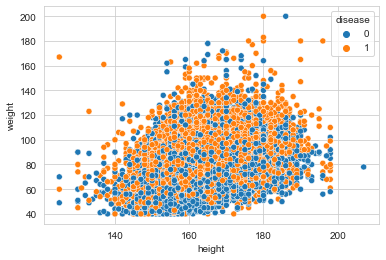

In [101]:
sns.scatterplot(x= 'height', y= 'weight', hue= 'disease', data= df_eda)

Looking at height and weight in this manner isn't very helpful.

In [26]:
# create BMI feature
def BMI (data):
    return round(data['weight'] / (data['height'] / 100) **2, 2)

df_eda['BMI'] = df_eda.apply(BMI, axis= 1)

In [27]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68413.0,53.333130,6.759749,29.60,48.40,54.00,58.40,65.00
gender,68413.0,0.650973,0.476666,0.00,0.00,1.00,1.00,1.00
height,68413.0,164.450835,7.842102,125.00,159.00,165.00,170.00,207.00
weight,68413.0,74.153387,14.259347,40.00,65.00,72.00,82.00,200.00
systolic,68413.0,126.744961,16.620734,85.00,120.00,120.00,140.00,240.00
diastolic,68413.0,81.366188,9.376343,52.00,80.00,80.00,90.00,182.00
cholesterol,68413.0,1.364931,0.679155,1.00,1.00,1.00,2.00,3.00
glucose,68413.0,1.225864,0.571804,1.00,1.00,1.00,1.00,3.00
smoke,68413.0,0.087966,0.283247,0.00,0.00,0.00,0.00,1.00
alcohol,68413.0,0.053396,0.224824,0.00,0.00,0.00,0.00,1.00


![BMI chart](images/BMI.jpg)

<center> We can see that there are some BMI readings that don't make sense.

Text(0, 0.5, 'BMI')

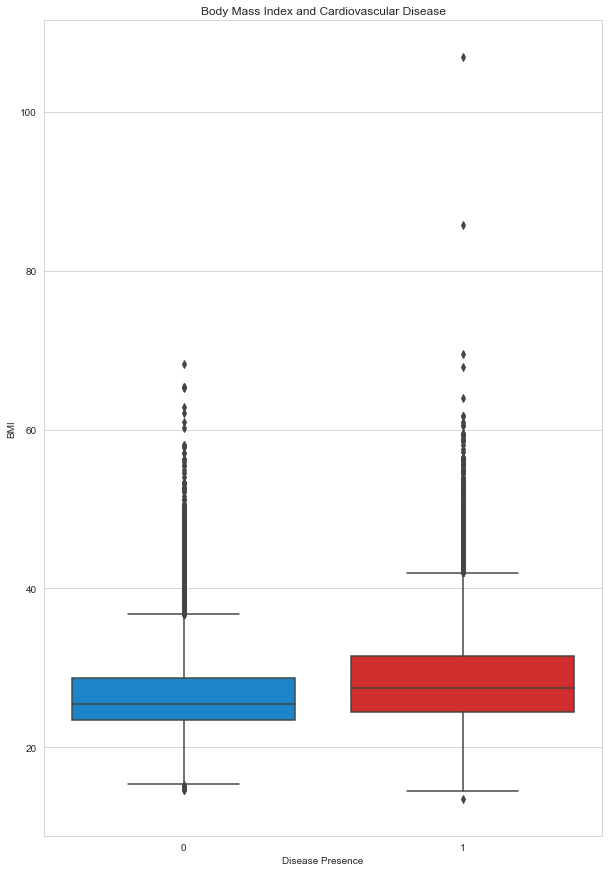

In [102]:
pal = ['#008ae6' , '#ec1313']

plt.figure(figsize= (10,15))
sns.boxplot(x = 'disease', y= 'BMI', data= df_eda, palette= pal)
plt.title('Body Mass Index and Cardiovascular Disease')
plt.xlabel('Disease Presence')
plt.ylabel('BMI')

A quick boxplot shows that individuals with CVD have, on average, higher body mass indexes than those that do not have CVD.

### Blood Pressure Category analysis

In [29]:
#function to categorize blood pressure
def bp_categories(systolic, diastolic):
    if systolic > 180 or diastolic > 120:
        return 'Crisis'
    elif (140 <= systolic < 180) or (90 <= diastolic < 120):
        return 'HBP_stage2'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90) :
        return 'HBP_stage1'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    else:
        return 'Normal'

In [30]:
# HTN is abbreviation for hypertension
df_eda['HTN_stage'] = df_eda[['systolic', 'diastolic']].apply\
(lambda x: bp_categories(*x), axis= 1)

In [31]:
df_eda.HTN_stage.value_counts()

HBP_stage1    32429
HBP_stage2    23120
Normal         9471
Elevated       3097
Crisis          296
Name: HTN_stage, dtype: int64

Text(0.5, 0, 'Blood Pressure Category')

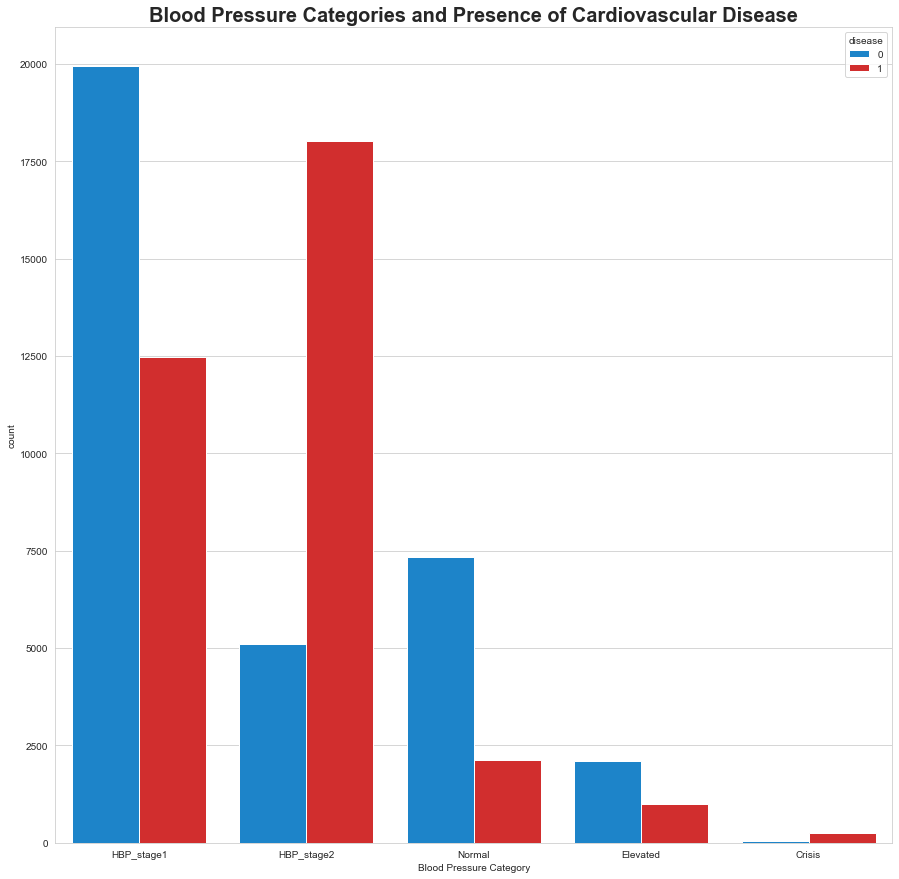

In [32]:
pal = ['#008ae6' , '#ec1313']

plt.figure(figsize= (15,15))
sns.countplot(x= 'HTN_stage', hue= 'disease', data= df_eda, palette= pal)
plt.title('Blood Pressure Categories and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 20)
plt.xlabel('Blood Pressure Category')

Groups that have a higher prevalence of cardiovascular disease have blood pressure that could be classified as Hypertension Stage 2 or Hypertensive Crisis.

The other categories, Normal, Elevated, and Hypertension Stage 1 have a higher prevalence of patients without cardiovascular disease, though it is still present.

### Age analysis

In [103]:
print(df_eda.age.min())
print(df_eda.age.max())
df_eda[df_eda['age'] < 30]

29.6


65.0

In [111]:
# bin ages into categories
df_eda.loc[(df_eda['age'] < 40), 'age_range'] = 30
df_eda.loc[(df_eda['age'] >= 40) & (df_eda['age'] < 50), 'age_range'] = 40
df_eda.loc[(df_eda['age'] >= 50) & (df_eda['age'] < 60), 'age_range'] = 50
df_eda.loc[(df_eda['age'] >= 60) & (df_eda['age'] < 70), 'age_range'] = 60


In [118]:
df_eda.age_range.value_counts(normalize= True)

50.0    0.507082
40.0    0.278427
60.0    0.191528
30.0    0.022963
Name: age_range, dtype: float64

Text(0.5, 0, 'Age Range')

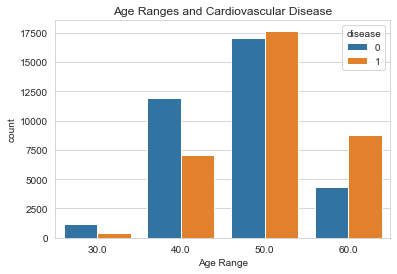

In [136]:
sns.countplot(x= 'age_range', hue= 'disease', data= df_eda)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')

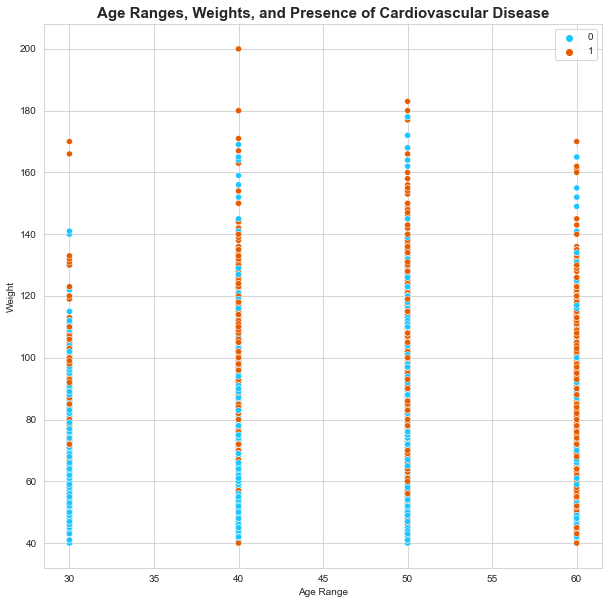

In [135]:
plt.figure(figsize= (10,10))
pal = ['#1ac6ff', '#e65c00']

sns.scatterplot(x= 'age_range', y= 'weight', hue= 'disease', data= df_eda, palette= pal)
plt.title('Age Ranges, Weights, and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 15)
plt.xlabel('Age Range')
plt.ylabel('Weight')
plt.legend()

Here we can see that as a person gets older, their chances of being diagnosed with cardiovascular disease increase. We can also see that weight doesn't really have an impact as much as age does. 

### Gender analysis

In [35]:
# determine which is male/female
df_eda.groupby('gender')['height'].mean()

gender
0    170.030279
1    161.459347
Name: height, dtype: float64

In [36]:
df_eda.groupby('gender')['weight'].mean()

gender
0    77.191369
1    72.524535
Name: weight, dtype: float64

In [46]:
df_eda.gender.value_counts(normalize= True)

1    44535
0    23878
Name: gender, dtype: int64

"0" in both analyses have the higher number. Historically, men are taller and weigh more than women. We can assume that the "0" refers to male and "1" refers to females. However, it is improtant to note that the data is imbalanced (almost $1/3$ to $2/3$).

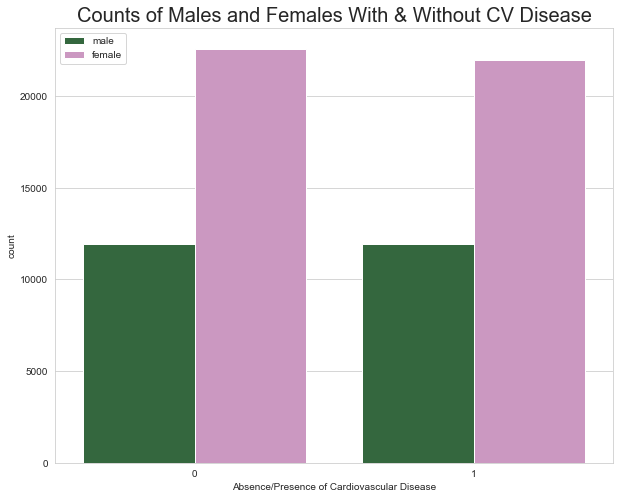

In [94]:
legend_labels = ['male', 'female']

plt.figure(figsize= (10, 8))
plt.title('Counts of Males and Females With & Without CV Disease', fontsize= 20)
sns.countplot(x= 'disease', hue= 'gender', data= df_eda, palette= 'cubehelix')
plt.xlabel('Absence/Presence of Cardiovascular Disease')
plt.legend(legend_labels)

In [58]:
df_eda.groupby('gender')['disease'].mean()

gender
0    0.499832
1    0.492826
Name: disease, dtype: float64

<Figure size 576x576 with 0 Axes>

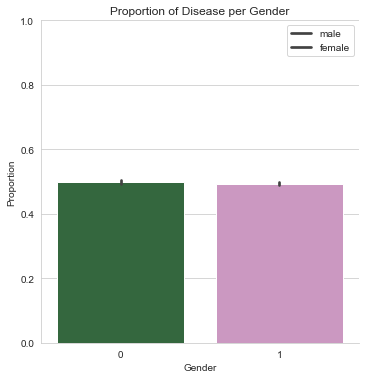

In [147]:
legend_labels = ['male', 'female']

plt.figure(figsize= (8,8))
sns.catplot(x='gender', y='disease', kind='bar', data=df, palette= 'cubehelix')
plt.ylim(0, 1)
plt.title('Proportion of Disease per Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(legend_labels)

At a quick glance, the first chart makes it appear as though women are diagnosed with CVD more often than men. However, when you look at the proportions of men and women with and without cardiovascular disease, they are the same.

### Other quick checks

In [138]:
#cholesterol?
df_eda.cholesterol.value_counts(normalize= True)

1    0.749814
2    0.135442
3    0.114744
Name: cholesterol, dtype: float64

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

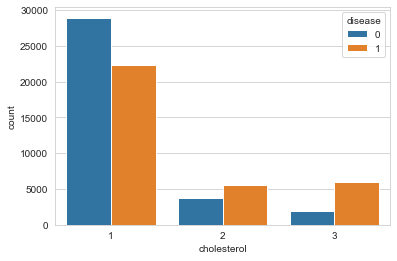

In [159]:
sns.countplot(x= 'cholesterol', hue= 'disease', data= df_eda)

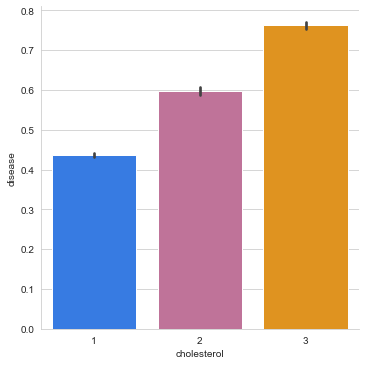

In [175]:
pal = ['#1a75ff', '#cc6699', '#ff9900']
sns.catplot(x= 'cholesterol', y= 'disease', data= df_eda, kind= 'bar', 
            palette= pal)

In [160]:
df_eda.groupby('cholesterol')['disease'].mean()

cholesterol
1    0.435971
2    0.597237
3    0.762420
Name: disease, dtype: float64

Having cholesterol levels "above normal" and "well above normal" increase an individuals chances of being diagnosed with cardiovascular disease. However, having "normal" cholesterol levels does not decrease your chances. There are many individuals with normal cholesterol levels and CVD.

76% of patients with cholesterol "well above normal" also have cardiovascular disease.

In [182]:
# active?
df_eda.active.value_counts(normalize= True)

1    0.803458
0    0.196542
Name: active, dtype: float64

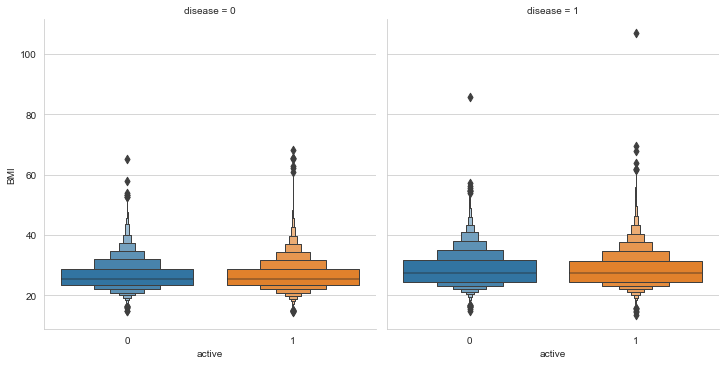

In [185]:
sns.catplot(x='active', y='BMI', col='disease', data=df_eda, kind='boxen')

In [188]:
df_eda.groupby(['active', 'disease'])['BMI'].mean()

active  disease
0       0          26.521442
        1          28.540764
1       0          26.460297
        1          28.436058
Name: BMI, dtype: float64

This visualization shows that patients without cardiovascular disease have similar body mass indexes, regardless of whether they classify themselves as active or not.

There is a slightly higher BMI for individuals that do have cardiovascular disease, but again, does not really differ if the patient is / is not active.

## Model

## Interpret

In [33]:
# len (df_eda[df_eda['gender'] == 0] & df_eda[df_eda['disease'] == 1])
# df_male = df.loc[(df['gender'] == 0) & (df['disease'] == 1)]
# # Separate areas into quadrants by latitude and longitude
# df.loc[(df['lat'] >= 47.5) & (df['long'] >= -122.2), 'quadrant' ] = 'NW'
# df.loc[(df['lat'] > 47.5) & (df['long'] < -122.2), 'quadrant' ] = 'NE'
# df.loc[(df['lat'] <= 47.5) & (df['long'] <= -122.2), 'quadrant' ] = 'SW'
# df.loc[(df['lat'] < 47.5) & (df['long'] > -122.2), 'quadrant' ] = 'SE'

# # A house shouldn't have 0 bathrooms. Let's change the zeros to ones.
# df1['bathrooms'] = df1['bathrooms'].map(lambda x: 1 if x == 0 else x)

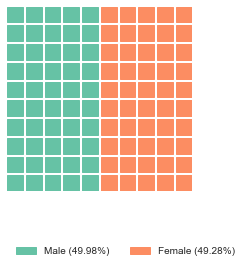

In [61]:

# waffle chart
# data = {'Male': 49.98, 'Female': 49.28}

# fig = plt.figure( 
#     FigureClass = Waffle, 
#     rows = 10, 
#     values = data, 
#     labels = ['{0} ({1}%)'.format(k, v) for k, v in data.items()],
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
    
# ) 

Text(0.5, 0, 'Proportion')

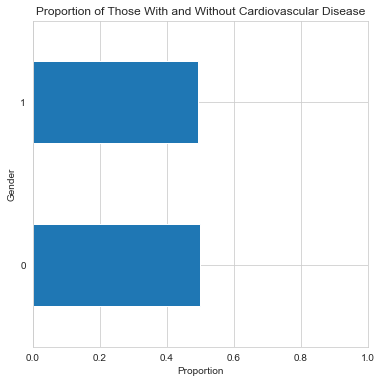

In [84]:
# plt.figure(figsize= (6,6))
# fig1 = df_eda.groupby('gender')['disease'].mean().plot(kind= 'barh')
# plt.xlim(0, 1)
# plt.title('Proportion of Those With and Without Cardiovascular Disease')
# plt.ylabel('Gender')
# plt.xlabel('Proportion')